
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](https://www.lendingclub.com/). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

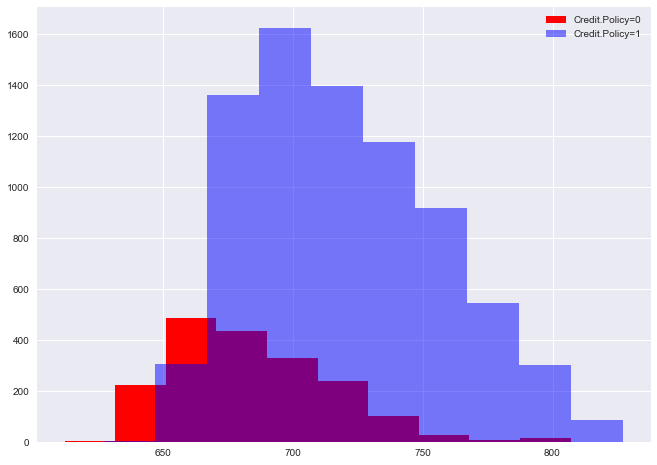

In [6]:
fig_size = (11, 8)
plt.subplots(figsize=fig_size)
x = loans[loans['credit.policy'] == 0]['fico']
y = loans[loans['credit.policy'] == 1]['fico']
plt.hist(x, color='r', label='Credit.Policy=0')
plt.hist(y, color='b', alpha=0.5, label='Credit.Policy=1')
plt.legend()
plt.show()

** Create a similar figure, except this time select by the not.fully.paid column.**

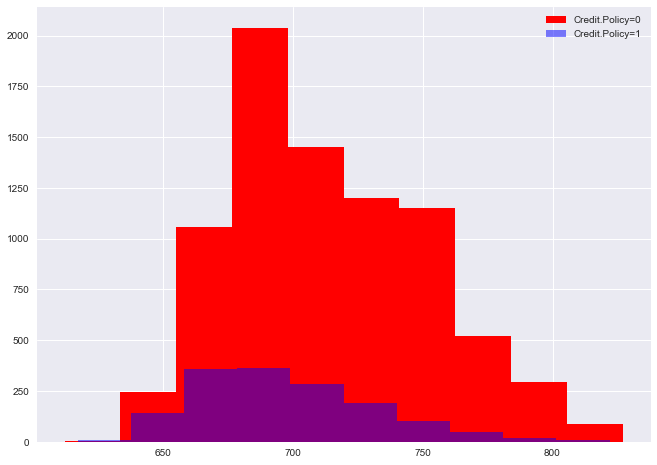

In [7]:
plt.subplots(figsize=fig_size)
x = loans[loans['not.fully.paid'] == 0]['fico']
y = loans[loans['not.fully.paid'] == 1]['fico']
plt.hist(x, color='r', label='Credit.Policy=0')
plt.hist(y, color='b', alpha=0.5, label='Credit.Policy=1')
plt.legend()
plt.show()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

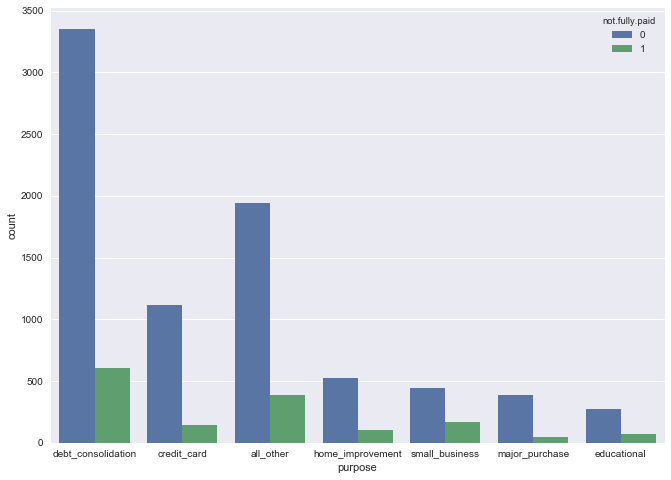

In [8]:
plt.subplots(figsize=fig_size)
sns.countplot(x="purpose", hue="not.fully.paid", data=loans)

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

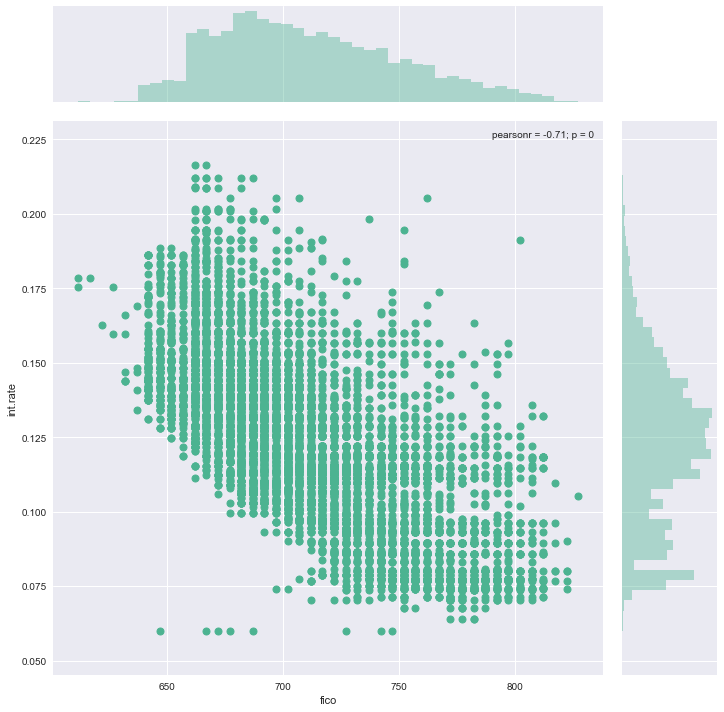

In [9]:
ax = sns.jointplot(x="fico", y="int.rate", data=loans, linewidth=1, color="#4CB391", size=10)

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

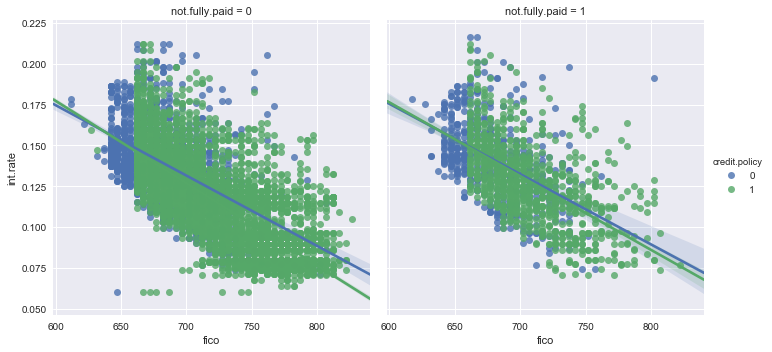

In [10]:
g = sns.lmplot(x="fico", y="int.rate", col="not.fully.paid", hue="credit.policy", data=loans)

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [12]:
cat_feats = loans.purpose.unique()
cat_feats

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [13]:
# final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True) # not working
final_data=pd.get_dummies(loans, columns=['purpose'],drop_first=True)

In [14]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

<p style="color: red;">Note: Our model will be trained using discrete-value columns in addition to the new dummy features.</p>

In [15]:
features = ["credit.policy","inq.last.6mths","delinq.2yrs","pub.rec","purpose_credit_card","purpose_debt_consolidation","purpose_educational","purpose_home_improvement","purpose_major_purchase","purpose_small_business"] #Significant features

from sklearn.cross_validation import train_test_split
# X = final_data.drop('not.fully.paid',axis=1)
# X = final_data
X = final_data[features]
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, final_data['not.fully.paid'], test_size=0.30, random_state=101)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6704, 10) (2874, 10) (6704,) (2874,)


## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [18]:
dt = DecisionTreeClassifier(max_depth=2,random_state=0)

In [19]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [20]:
dt_pred = dt.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,dt_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.00      0.00      0.00       443

avg / total       0.72      0.85      0.78      2874



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
print(confusion_matrix(y_test,dt_pred))

[[2431    0]
 [ 443    0]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators=100)

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [27]:
rf_pred = rf.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,rf_pred))

             precision    recall  f1-score   support

          0       0.85      0.99      0.91      2431
          1       0.46      0.06      0.10       443

avg / total       0.79      0.84      0.79      2874



**Show the Confusion Matrix for the predictions.**

In [30]:
print(confusion_matrix(y_test,rf_pred))

[[2401   30]
 [ 417   26]]


### What performed better the random forest or the decision tree?**

By comparing the accuracy results down below between DT and RFC it can be seen that the latter did not give advantage over the former model, in which both give similar accuracy results. Importantly, overfitting, by the RFC, has not been avoided in comparison with DT. This has been shown by testing accuracy of prediction over the training set.

#### Accuracy test between Train and Test sets using Decision Tree Model
##### DT Train Set

In [31]:
dt_pred_train = dt.predict(X_train)
print(classification_report(y_train,dt_pred_train))
dt_cm = confusion_matrix(y_train,dt_pred_train)
print(dt_cm)
TN = dt_cm[0][0]
TP = dt_cm[1][1]
FN = dt_cm[1][0]
FP = dt_cm[0][1]
total = TN + TP + FN + FP
print('Accuracy: ', ((TP+TN)/total).round(2))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      5614
          1       0.00      0.00      0.00      1090

avg / total       0.70      0.84      0.76      6704

[[5614    0]
 [1090    0]]
Accuracy:  0.84


/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### DT Test Set

In [32]:
dt_pred_test = dt_pred
print(classification_report(y_test,dt_pred_test))
dt_cm = confusion_matrix(y_test,dt_pred_test)
TN = dt_cm[0][0]
TP = dt_cm[1][1]
FN = dt_cm[1][0]
FP = dt_cm[0][1]
total = TN + TP + FN + FP
print('Accuracy: ', ((TP+TN)/total).round(2))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.00      0.00      0.00       443

avg / total       0.72      0.85      0.78      2874

Accuracy:  0.85


/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Accuracy test between Train and Test sets using Random Forest Classifier
##### RFC Train Set

In [33]:
rf_pred_train = rf.predict(X_train)
print(classification_report(y_train,rf_pred_train))
rf_cm = confusion_matrix(y_train,rf_pred_train)
TN = rf_cm[0][0]
TP = rf_cm[1][1]
FN = rf_cm[1][0]
FP = rf_cm[0][1]
total = len(rf_pred_train)
print('Accuracy: ', ((TP+TN)/total).round(2))

             precision    recall  f1-score   support

          0       0.85      0.99      0.92      5614
          1       0.74      0.11      0.20      1090

avg / total       0.83      0.85      0.80      6704

Accuracy:  0.85


##### RFC Test Set

In [34]:
rf_pred_test = rf_pred
print(classification_report(y_test,rf_pred_test))
rf_cm = confusion_matrix(y_test,rf_pred_test)
TN = rf_cm[0][0]
TP = rf_cm[1][1]
print(TN, TP)
FN = rf_cm[1][0]
FP = rf_cm[0][1]
print(FN, FP)
total = TN + TP + FN + FP
print('Accuracy: ', ((TP+TN)/total).round(2))

             precision    recall  f1-score   support

          0       0.85      0.99      0.91      2431
          1       0.46      0.06      0.10       443

avg / total       0.79      0.84      0.79      2874

2401 26
417 30
Accuracy:  0.84


#### Cross Validation Test

In [35]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print('DT scores: ', dt_scores)
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(dt_scores.mean(), dt_scores.std()))
print('********************************************************')
rfc_scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print('RFC scores: ', rfc_scores)
print('RFC scores mean: ',rfc_scores.mean())
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(rfc_scores.mean(), rfc_scores.std()))

DT scores:  [ 0.83941606  0.83941606  0.83941606  0.84029228  0.84029228  0.84012539
  0.84012539  0.84012539  0.81713689  0.84012539]
Average cross-validation score: 0.84 +/- 0.01
********************************************************
RFC scores:  [ 0.83420229  0.8362878   0.83420229  0.84237996  0.83611691  0.83908046
  0.84639498  0.85788924  0.78265413  0.69592476]
RFC scores mean:  0.820513283005
Average cross-validation score: 0.82 +/- 0.05


# Great Job!